<a href="https://colab.research.google.com/github/DanteRobert1/Optativa_Liz_Uaa/blob/main/BD_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install pandas matplotlib seaborn plotly
#!pip install --upgrade pandas seaborn


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --upgrade pandas seaborn


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/DanteRobert1/Optativa_Liz_Uaa/refs/heads/main/NetFlix.csv', sep = ',' )

In [ ]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,int64


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,5-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,1-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,3-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...


In [ ]:
print(df['date_added'].head())

0    14-Aug-20
1    15-Dec-17
2     5-Jan-19
3     1-Mar-16
4     3-Dec-18
Name: date_added, dtype: object


In [ ]:
# intentamos convertir directamente, capturando errores
try:
    df['date_added'] = pd.to_datetime(df['date_added'])
except ValueError as e:
   df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

<ipython-input-3-0b648db50b9b>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_added'] = pd.to_datetime(df['date_added'])


In [ ]:
# Verificar el tipo de dato despues de la conversion
print(df['date_added'].dtype)

datetime64[ns]


In [ ]:
#Mostrar las primeras filas para verificar la conversion
print(df['date_added'].head())

# Si hay valores NaT (Not a Time) despues de la conversion,
# los podemos identificar asi:
print(df['date_added'].isna().sum())

0   2020-08-14
1   2017-12-15
2   2019-01-05
3   2016-03-01
4   2018-12-03
Name: date_added, dtype: datetime64[ns]
10


In [ ]:
#Definir un diccionario de mapeo de ratings a valores numeros
rating_map = {
    'G': 1,
    'PG': 2,
    'PG-13': 3,
    'R': 4,
    'NC-17': 5,
    'TV-Y': 1,
    'TV-Y7': 2,
    'TV-G': 1,
    'TV-PG': 2,
    'TV-14': 3,
    'TV-MA': 4,
}

In [ ]:
# Crear una nueva columna 'rating_numeric'
df['rating_numeric'] = df['rating'].map(rating_map).fillna(0)

In [ ]:
print (df[['rating', 'rating_numeric']].head())

print (df['rating_numeric'].describe())

  rating  rating_numeric
0  TV-MA             4.0
1  TV-MA             4.0
2  TV-PG             2.0
3      R             4.0
4   TV-G             1.0
count    7787.000000
mean        3.112752
std         0.996720
min         0.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: rating_numeric, dtype: float64


In [ ]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,rating_numeric
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4.0
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,4.0
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,2019-01-05,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...,2.0


In [ ]:
# Para variables numericas
numeric_columns = ['release_year', 'duration', 'rating_numeric']
print("Estadisticas descriptivas para variables numericas: ")
print(df[numeric_columns].describe())

Estadisticas descriptivas para variables numericas: 
       release_year     duration  rating_numeric
count   7787.000000  7787.000000     7787.000000
mean    2013.932580    69.122769        3.112752
std        8.757395    50.950743        0.996720
min     1925.000000     1.000000        0.000000
25%     2013.000000     2.000000        3.000000
50%     2017.000000    88.000000        3.000000
75%     2018.000000   106.000000        4.000000
max     2021.000000   312.000000        5.000000


Medidaes de tendencia central

In [ ]:
print ("\ Medidas de tendencia central para variables numericas:")
for column in numeric_columns:
    print(f"\n: {column}")
    print(f"Media: {df[column].mean():.2f}")
    print(f"Mediana: {df[column].median():.2f}")
    print(f"Moda: {df[column].mode().iloc[0]:.2f}")

\ Medidas de tendencia central para variables numericas:

: release_year
Media: 2013.93
Mediana: 2017.00
Moda: 2018.00

: duration
Media: 69.12
Mediana: 88.00
Moda: 1.00

: rating_numeric
Media: 3.11
Mediana: 3.00
Moda: 4.00


In [ ]:
categorical_columns = ['type', 'rating', 'genres']
print("\nEstadistica para variables categoricas: ")
for column in categorical_columns:
    print(f"\n: {column}")
    print(df[column].value_counts())
    print(f"Moda:{df[column].mode().values[0]}")


Estadistica para variables categoricas: 

: type
type
Movie      5377
TV Show    2410
Name: count, dtype: int64
Moda:Movie

: rating
rating
TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64
Moda:TV-MA

: genres
genres
Documentaries                                                      334
Stand-Up Comedy                                                    321
Dramas, International Movies                                       320
Comedies, Dramas, International Movies                             243
Dramas, Independent Movies, International Movies                   215
                                                                  ... 
British TV Shows, Docuseries, TV Comedies                            1
Horror Movies, International Movies, Sci-Fi & Fantasy                1

In [ ]:
# Estadisticas para la columna de fecha
print("\nEstadisticas para la columna de fecha: ")
print(f"Fecha temprana: {df['date_added'].min()}")
print(f"Fecha reciente: {df['date_added'].max()}")
print(f"Rango de fechas: {df['date_added'].max() - df['date_added'].min()}")


Estadisticas para la columna de fecha: 
Fecha temprana: 2008-01-01 00:00:00
Fecha reciente: 2021-01-16 00:00:00
Rango de fechas: 4764 days 00:00:00


In [ ]:
object_columns = ['show_id', 'title', 'director', 'cast', 'country', 'description']
print("\nConteo de valores unicos para otras columnas de objeto:")
for column in object_columns:
    print(f"{column}: {df[column].nunique()} valores unicos")


Conteo de valores unicos para otras columnas de objeto:
show_id: 7787 valores unicos
title: 7787 valores unicos
director: 4049 valores unicos
cast: 6831 valores unicos
country: 681 valores unicos
description: 7769 valores unicos


In [ ]:
df.describe()

,date_added,release_year,duration,rating_numeric
count,7777,7787.000000,7787.000000,7787.000000
mean,2019-01-02 19:20:57.708627712,2013.932580,69.122769,3.112752
min,2008-01-01 00:00:00,1925.000000,1.000000,0.000000
25%,2018-02-01 00:00:00,2013.000000,2.000000,3.000000
50%,2019-03-08 00:00:00,2017.000000,88.000000,3.000000
75%,2020-01-20 00:00:00,2018.000000,106.000000,4.000000
max,2021-01-16 00:00:00,2021.000000,312.000000,5.000000
std,NaN,8.757395,50.950743,0.996720


In [ ]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,rating_numeric
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4.0
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,4.0


In [ ]:
#Manejo de Datos faltantes y Duplicados
df.dropna(subser=['director'], inplace=True)
df.drop_duplicates(inplace=True)

Graficos

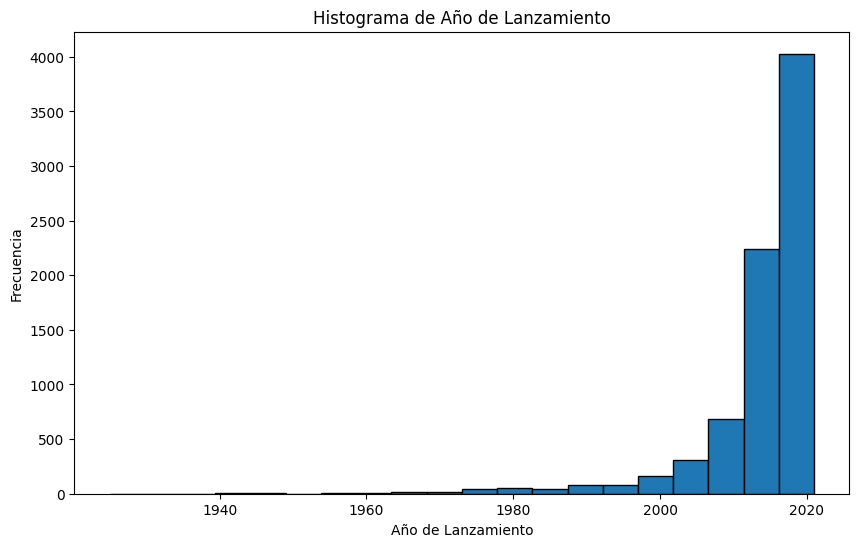

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['release_year'], bins=20, edgecolor='black')
plt.title('Histograma de Año de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Frecuencia')
plt.show()
'''
Las Peliculas de los años de 2000 a 2020 tienen mas lanzamientos con una frecuencia de 400 la mas alta, las antiguias tienen menos lanzamientos. incluso menos lanzamientos en el año 2019.
'''


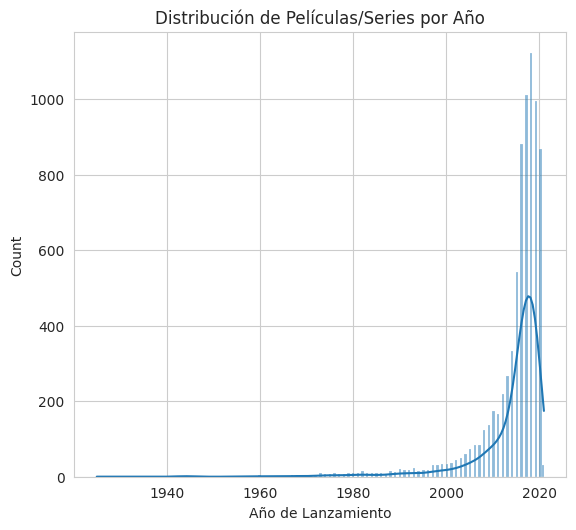

In [ ]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")

plt.subplot(2, 3, 1)
sns.histplot(df['release_year'], kde=True)
plt.title('Distribución de Películas/Series por Año')
plt.xlabel('Año de Lanzamiento')

plt.tight_layout()
plt.show()

'''
Las Peliculas de los años de 2000 a 2020 tienen mas lanzamientos con una frecuencia de 400 la mas alta, las antiguias tienen menos lanzamientos. incluso menos lanzamientos en el año 2019.
Solo que aqui es mas a detalle
'''

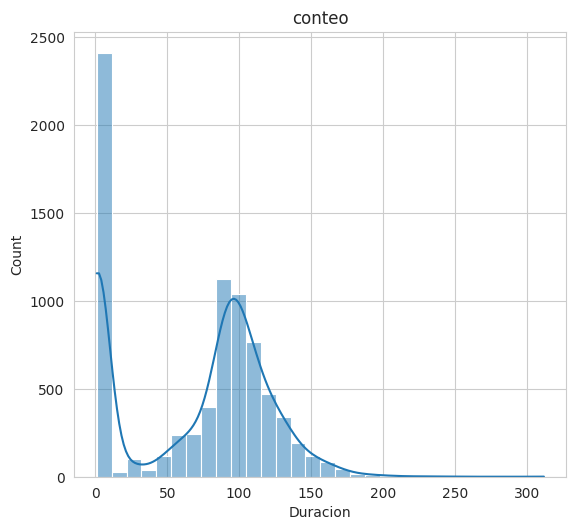

In [ ]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")

plt.subplot(2, 3, 1)
sns.histplot(df['duration'], kde=True)
plt.title('conteo')
plt.xlabel('Duracion')

plt.tight_layout()
plt.show()
'''
Las peliculas tiene una duracion expecifica, cada uno, en caso de conteo muchas peliculas tienen una duracion de 100min pero hay demasiadas que no tienen duracion definida. Lo cual es mucho la mayoria de las peliculas.
'''

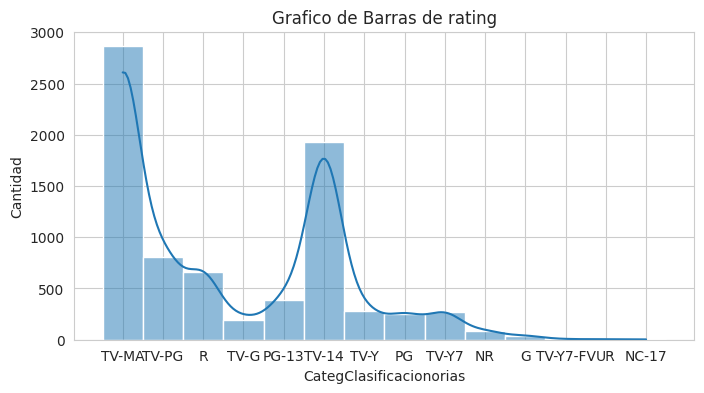

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['rating'], kde=True)
plt.xlabel('CategClasificacionorias')
plt.ylabel('Cantidad')
plt.title('Grafico de Barras de rating')
plt.show()
'''
Las Categorias TV-MAT a tiene mas cantidades de rating de una cantidad de entre 2800 o 2700 mientras que la segunda lo tiene la categoria TV-14 con 1900 o 1800, por lo que se puede ver una diferencia entre las categorias.
'''

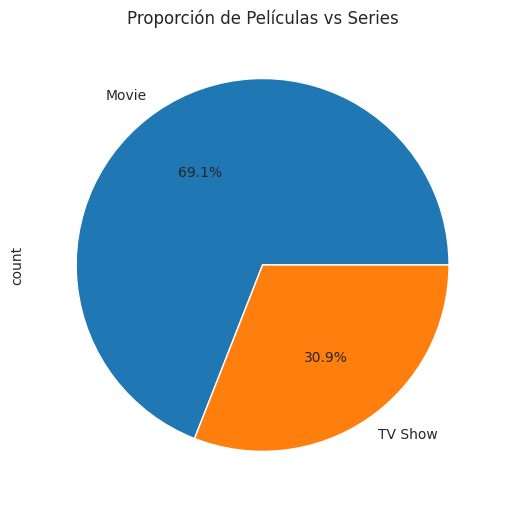

In [ ]:
# Grafico de Pastel
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 4)
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción de Películas vs Series')


plt.tight_layout()
plt.show()
'''
En esta grafica de pastel, se puede puede ver que la pelicula tiene mas cantidades que la series(TV Show) ya que le gana con mucha diferencia.
'''

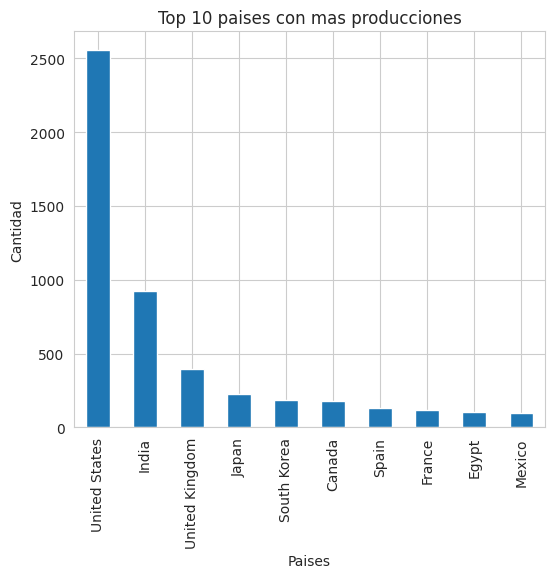

In [ ]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 3)
df['country'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 paises con mas producciones')
plt.xlabel('Paises')
plt.ylabel('Cantidad')

plt.tight_layout()
plt.show()
'''
El Pais con mas producciones es E.U con una cantidad de mas de 2500 producciones mientras que el ultimo lugar es Mexico con menos de 500 producciones.
'''

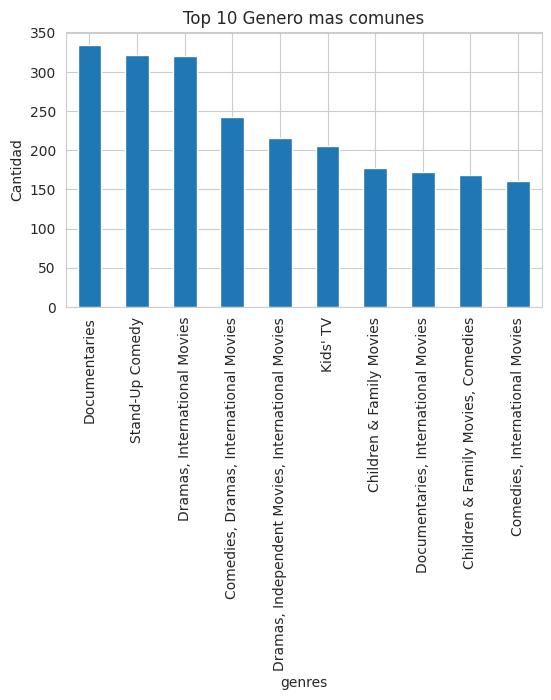

In [ ]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 6)
df['genres'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Genero mas comunes')
plt.ylabel('Cantidad')


plt.tight_layout()
plt.show()
'''
Aqui los generos van por top 10, dejando como primero los documentales con mas cantidades de mas de 300 cantidades, mientras que el segundo tiene una cantidad de 300 pero menos que los documentales.
'''

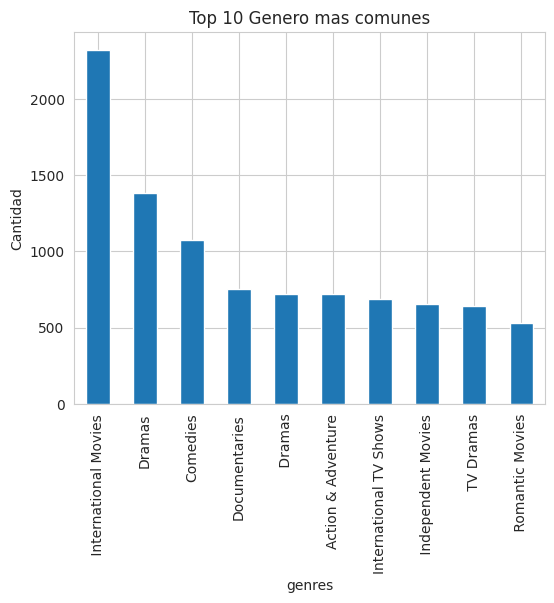

In [ ]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
plt.subplot(2, 3, 6)
df['genres'].str.split(',').explode().value_counts().nlargest(10).plot(kind='bar') # con el uso del split, hace una division de caracteres para que tome varios en una linea, en vez de solo 1
plt.title('Top 10 Genero mas comunes')
plt.ylabel('Cantidad')


plt.tight_layout()
plt.show()
'''
Aqui los generos van por top 10, dejando como primero las peliculas internacionales con mas cantidades de mas de 2000 cantidades, mientras que el segundo que es Dramas tiene una cantidad de mas de 1000.
'''